In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def openFiles(fileName):
    with open(fileName) as file:
        data = np.fromfile(file, sep= " ", dtype=float)
    phi, energy, error= data.reshape(-1,3).T
    return phi, energy


def genData(fileNames:dict[str,str]):
    for fileName in fileNames.keys():
        data = openFiles(fileName)
        label = fileNames[fileName]
        yield data, label

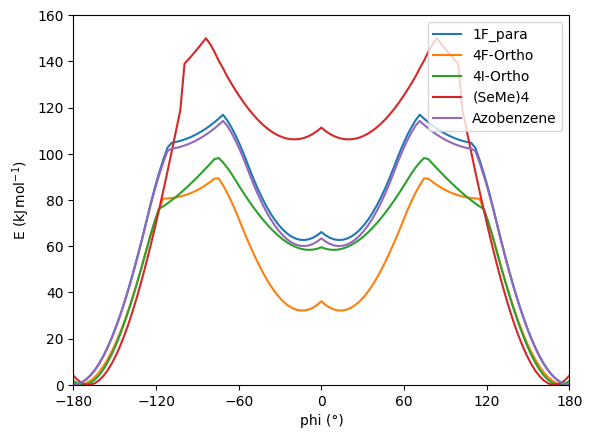

In [41]:
fileNames= {
    "energys_1FPara.xvg": "1F_para",
    "energys_4FOrtho.xvg" : "4F-Ortho",
    "energys_4IOrtho.xvg": "4I-Ortho",
    "energys_(SeMe)4.xvg" : "(SeMe)4",
    "energys_Azobenzene.xvg" : "Azobenzene",
}

fig, ax = plt.subplots()
ax.set_xlim(-180, 180)
ax.set_ylim(0, 160)
ax.set_xticks([x for x in range(-180, 181, 60)])
for data, label in genData(fileNames):
    ax.plot(data[0], data[1], label = label)
ax.legend(loc =1 )
ax.set_xlabel(r"phi (°)")
ax.set_ylabel(r"E ($\text{kJ}\,\text{mol}^{-1}$)")
fig.savefig("energys.png")

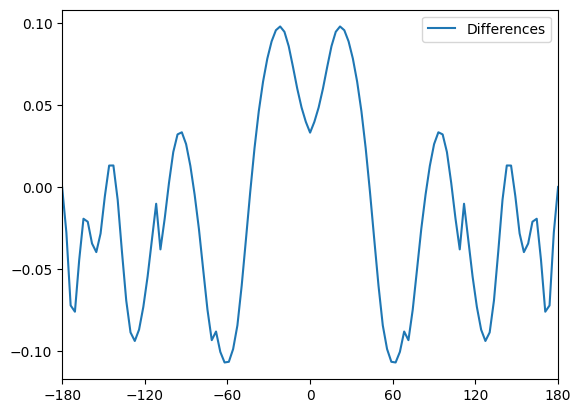

In [43]:
fileNames= {
    #"energys_1FPara.xvg": "1F_para",
    #"energys_4FOrtho.xvg" : "4F-Ortho",
    "energys_AzobenzOld.xvg": "AzobenzeneOld",
    #"energys_4IOrtho.xvg": "4I-Ortho",
    #"energys_(SeMe)4.xvg" : "(SeMe)4",
    "energys_Azobenzene.xvg" : "Azobenzene",
}

phi1, energy1 = openFiles("energys_AzobenzOld.xvg")
phi2, energy2 = openFiles("energys_Azobenzene.xvg")


fig, ax = plt.subplots()
ax.set_xlim(-180, 180)
#ax.set_ylim(0, 160)
ax.set_xticks([x for x in range(-180, 181, 60)])
ax.plot(phi1, (energy1-energy2), label = "Differences")
ax.legend();
fig.savefig("differences.png")